In [1]:
%pylab inline
from ast import literal_eval
from struct import *
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

Populating the interactive namespace from numpy and matplotlib


##FA Grid
####By Sergio Daniel Hernandez Charpak

Notebook to try to interact with the Fractional Anisotropy (FA) grid directly from the CIC files. 
Here we read the results and plot them.

In [2]:
def writeFirstLine(filename,line):
    with open(filename,'r+') as f:
        content = f.read()
        f.seek(0,0)
        f.write(line.rstrip('\r\n') + '\n' + content)
def readFirstLine(filename):
    with open(filename, 'r') as f:
        first_line = f.readline()
        return first_line

The next function reads the eigenvalues

In [3]:
def read_CIC_scalar(filename):
    f = open(filename, "rb")
    dumb = f.read(38)

    dumb = f.read(4)
    n_x = f.read(4)
    n_y = f.read(4)
    n_z = f.read(4)
    nodes = f.read(8)
    x0 = f.read(4)
    y0 = f.read(4)
    z0 = f.read(4)
    dx = f.read(4)
    dy = f.read(4)
    dz = f.read(4)
    dumb = f.read(4)

    n_x = (unpack('i', n_x))[0]
    n_y = (unpack('i', n_y))[0]
    n_z = (unpack('i', n_z))[0]
    nodes = (unpack('q', nodes))[0]
    dx = (unpack('f', dx))[0]
    dy = (unpack('f', dy))[0]
    dz = (unpack('f', dz))[0]
    x0 = (unpack('f', x0))[0]
    y0 = (unpack('f', y0))[0]
    z0 = (unpack('f', z0))[0]
    print n_x, n_y, n_z, nodes, dx, dy, dz

    total_nodes = n_x * n_y *n_z
    dumb = f.read(4)
    array_data = f.read(total_nodes*4)
    dumb = f.read(4)
    format_s = str(total_nodes)+'f'
    array_data = unpack(format_s, array_data)
    f.close()
    array_data  = np.array(array_data)
    array_data.resize(n_z,n_y,n_x)
    array_data = array_data.transpose()
    return array_data


def read_CIC_vector(filename):
    f = open(filename, "rb")
    dumb = f.read(38)

    dumb = f.read(4)
    n_x = f.read(4)
    n_y = f.read(4)
    n_z = f.read(4)
    nodes = f.read(4)
    x0 = f.read(4)
    y0 = f.read(4)
    z0 = f.read(4)
    dx = f.read(4)
    dy = f.read(4)
    dz = f.read(4)
    dumb = f.read(4)

    n_x = (unpack('i', n_x))[0]
    n_y = (unpack('i', n_y))[0]
    n_z = (unpack('i', n_z))[0]
    nodes = (unpack('i', nodes))[0]
    dx = (unpack('f', dx))[0]
    dy = (unpack('f', dy))[0]
    dz = (unpack('f', dz))[0]
    x0 = (unpack('f', x0))[0]
    y0 = (unpack('f', y0))[0]
    z0 = (unpack('f', z0))[0]
    print n_x, n_y, n_z, nodes, dx, dy, dz

    total_nodes = 3 * n_x * n_y *n_z
    dumb = f.read(4)
    array_data = f.read(total_nodes*4)
    dumb = f.read(4)
    format_s = str(total_nodes)+'f'
    array_data = unpack(format_s, array_data)
    f.close()
    array_data  = np.array(array_data)
    array_data.resize(n_z,n_y,n_x,3)
    vec = array_data[0,0,0,:]
    vec = array_data[0,0,1,:]
    array_data = array_data.transpose()
    #final shape is [3,n_x,n_y,n_z]
    return array_data


#filein="/store/04/bolshoi/V-web/clues/256/snap_190.CIC.s1.00.eigenvec_1"
def test_vector_plot():
    filein="/home/extforer/TV-Web/data/snap_136.s1.00.eigenvec_1"
    eigenvec_1 = read_CIC_vector(filein)

    x_component = eigenvec_1[0,:,:,:]
    x_component = x_component.flatten()
    x_component = np.absolute(x_component)

    print x_component.shape
    nbins = 20
    mu_bins = np.linspace(0.0,1.0,nbins)
    
    histo_mu_x, mu_x_range = np.histogram(x_component, bins=mu_bins)
    histo_mu_x = 1.0*histo_mu_x
    
    delta_x = 1.0/(1.0*nbins)
    histo_mu_x = histo_mu_x/sum(histo_mu_x)/delta_x
    print histo_mu_x, mu_x_range


    rc('text', usetex=True)
    rc('font', family='serif')

#plt.plot(mu_x_range[:-1], histo_mu_x, label="$e_{3}\cdot \hat{x}$")

    plt.plot(histo_mu_x, histo_mu_x, label="$e_{3}\cdot \hat{x}$")

    ylim([0.8, 1.2])
    xlim([0.0, 1.0])
    plt.legend(loc='upper left')
    plt.xlabel("$M_{1500}$")
    plt.ylabel("$\Phi(M_{1500})$ (Mpc$^{-3}$ mag$^{-1}$)")
    plt.savefig('BOX10909_smooth_1.0_align_e3.pdf')


def test_FA_plot(file1, file2, file3):
    eigenval1  = read_CIC_scalar(file1)
    eigenval2  = read_CIC_scalar(file2)
    eigenval3  = read_CIC_scalar(file3)

    
    FA = (eigenval1-eigenval3)**2  + (eigenval2-eigenval3)**2  + (eigenval1-eigenval2)**2 
    FA = FA/(eigenval1**2 + eigenval2**2 + eigenval3**2)
    FA = np.sqrt(FA)/np.sqrt(3.0)

    cut = FA[40,:,:]

    plt.imshow(cut.T)
    print cut.min(), cut.max()
    plt.savefig('test_FA_cut.pdf')

In [5]:
inputfolder = '../../Outputs/07_04_2016/'
inputfile_1 = 'snapshot_005.eigen_1'
inputfile_2 = 'snapshot_005.eigen_2'
inputfile_3 = 'snapshot_005.eigen_3'

Now let us get the three eigenvalues grids

In [6]:
grid_1 = read_CIC_scalar(inputfolder+inputfile_1)
grid_2 = read_CIC_scalar(inputfolder+inputfile_2)
grid_3 = read_CIC_scalar(inputfolder+inputfile_3)

256 256 256 16777216 976.5625 976.5625 976.5625
256 256 256 16777216 976.5625 976.5625 976.5625
256 256 256 16777216 976.5625 976.5625 976.5625


Now let us form the FA grid

In [7]:
FA = (grid_1-grid_3)**2  + (grid_2-grid_3)**2  + (grid_1-grid_2)**2 
FA = FA/(grid_1**2 + grid_2**2 + grid_3**2)
FA = np.sqrt(FA)/np.sqrt(3.0)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from IPython.kernel.zmq import kernelapp as app


min:  0.107134740824  max:  0.999999999983


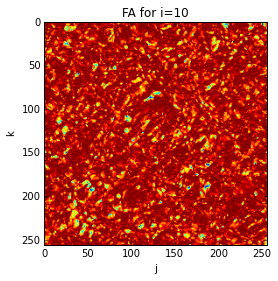

In [8]:
cut = FA[10,:,:]

plt.imshow(cut.T)
plt.title("FA for i=10")
plt.xlabel("j")
plt.ylabel("k")
print "min: ", cut.min()," max: ", cut.max()

Now let us find the minimum values

In [19]:
n_x,n_y,n_z = shape(FA)
grid_95 = np.zeros(shape(FA))
print shape(grid_95)

(256, 256, 256)


In [21]:
for i in range(0,n_x):
    for j in range(0,n_y):
        for k in range(0,n_z):
            if FA[i,j,k]>0.95:
                grid_95[i,j,k] = FA[i,j,k] 
   

min:  0.0  max:  0.999999999983


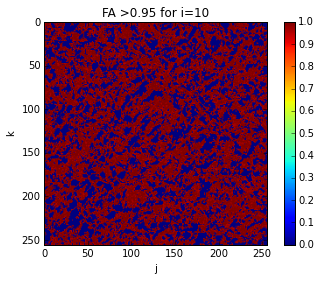

In [23]:
cut_95 = grid_95[10,:,:]

plt.imshow(cut_95.T)
plt.colorbar()
plt.title("FA >0.95 for i=10")
plt.xlabel("j")
plt.ylabel("k")
print "min: ", cut_95.min()," max: ", cut_95.max()

First let's read the first line with all the parameters.
Its format is:
long long* n_nodes, long long* n_total_gen, int* n_x_gen, int* n_y_gen, int* n_z_gen, long long* n_nodes_gen, float* dx_gen, float* dy_gen, float* dz_gen, float* x_0_gen, float* y_0_gen, float* z_0_gen

In [42]:
firstline = readFirstLine(inputfolder+inputfile)
firstline = firstline.strip('\n')
firstline_array = firstline.split("\t")

In [43]:
n_nodes = (longlong(firstline_array[0]))
n_total = (longlong(firstline_array[1]))
n_x = (int(firstline_array[2]))
n_y = (int(firstline_array[3]))
n_z = (int(firstline_array[4]))
dx = (float(firstline_array[5]))
dy = (float(firstline_array[6]))
dz = (float(firstline_array[7]))
x_0 = (float(firstline_array[8]))
y_0 = (float(firstline_array[9]))
z_0 = (float(firstline_array[10]))

Now that we know the general parameters of the file we can proceed to read the rest of the file.
First we form the grid.

In [44]:
grid_FA = np.zeros((n_x,n_y,n_z))
print grid_FA.shape

(256, 256, 256)


In [45]:
f = open(inputfolder+inputfile)
count =0
#firstline again. We ignore it
line = f.readline()
#now we proceed to reading the rest
#each line corresponds to a i,j
for i in range (n_x):
    line = f.readline()
    if (line != '\n'):
        for j in range (n_y): 
            line = line.strip('\n')
            line_array = line.split("\t")
            for k in range (n_z):
                grid_FA[i,j,k] = double(line_array[k])
f.close()

In [46]:
max_FA, min_FA = grid_FA.max(), grid_FA.min()
print max_FA, min_FA
grid_FA

inf 0.57735


##Problem
These values are problematic. It seems that the FA isn't normalized.
We normalize but it is very likely the error comes from the C code.

In [60]:
new_grid_FA = grid_FA/max_FA

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


In [61]:
new_max_FA, new_min_FA = new_grid_FA.max(), new_grid_FA.min()
print new_max_FA, new_min_FA

nan nan


In [11]:
new_grid_FA_1D = np.zeros(n_nodes)
for i in range (n_x):
    for j in range (n_y): 
        for k in range (n_z):
            new_grid_FA_1D[i + n_x * (j + n_y * k)] = new_grid_FA[i,j,k]

In [47]:
grid_FA_1D = np.zeros(n_nodes)
for i in range (n_x):
    for j in range (n_y): 
        for k in range (n_z):
            grid_FA_1D[i + n_x * (j + n_y * k)] = grid_FA[i,j,k]

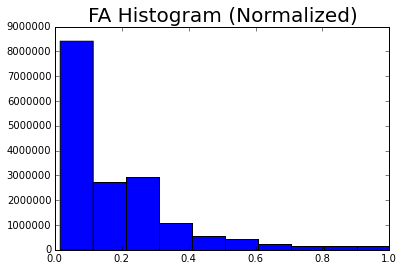

In [13]:
fig = plt.figure()
#binwidth=0.00000001
#plt.hist(new_grid_FA_1D, bins=np.arange(new_min_FA, new_max_FA + binwidth, binwidth))
plt.hist(new_grid_FA_1D)
#plt.xlabel('
plt.title('FA Histogram (Normalized)', fontsize=20)
#plt.close(fig)

In [14]:
plt.close(fig)
print max(new_grid_FA_1D), min(new_grid_FA_1D)

1.0 0.0167493972731


/home/shernand/.local/lib/python2.7/site-packages/numpy/core/function_base.py:99: RuntimeWarning: invalid value encountered in multiply
  y = _nx.arange(0, num, dtype=dtype) * step + start
/home/shernand/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:1114: RuntimeWarning: invalid value encountered in subtract
  return a[slice1]-a[slice2]


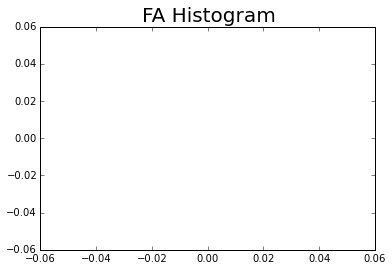

In [48]:
fig = plt.figure()
plt.hist(grid_FA_1D)
#plt.xlabel('
plt.title('FA Histogram', fontsize=20)
#plt.close(fig)

In [16]:
plt.close(fig)

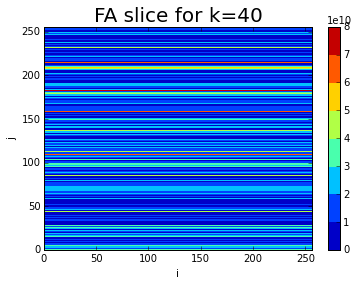

In [18]:
x = np.linspace(0, n_x, n_x)
X, Y = np.meshgrid(x, x)
plt.pcolor(X, Y, grid_FA[:,:,0])
plt.contourf(X, Y, grid_FA[:,:,40])
plt.colorbar()
plt.title('FA slice for k=40', fontsize=20)
plt.xlabel('i')
plt.ylabel('j')

In [19]:
plt.close(fig)
print new_grid_FA[0:10,0:10,0:10]

[[[ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.04482859  0.43382056]
  [ 0.02584321  0.04953402  0.27977352  0.01794259  0.28629402  0.28848266
    0.0168182   0.2876258   0.044828

All these results are definitively strange

##Test Divergence Grid
The divergence corresponds of the sum of the 3 eigen values

In [62]:
inputfile = 'div_1.dat'

In [63]:
firstline = readFirstLine(inputfolder+inputfile)
firstline = firstline.strip('\n')
firstline_array = firstline.split("\t")

In [64]:
n_nodes = (longlong(firstline_array[0]))
n_total = (longlong(firstline_array[1]))
n_x = (int(firstline_array[2]))
n_y = (int(firstline_array[3]))
n_z = (int(firstline_array[4]))
dx = (float(firstline_array[5]))
dy = (float(firstline_array[6]))
dz = (float(firstline_array[7]))
x_0 = (float(firstline_array[8]))
y_0 = (float(firstline_array[9]))
z_0 = (float(firstline_array[10]))

In [65]:
grid_Div = np.zeros((n_x,n_y,n_z))
print grid_Div.shape

(256, 256, 256)


In [66]:
f = open(inputfolder+inputfile)
count =0
#firstline again. We ignore it
line = f.readline()
#now we proceed to reading the rest
#each line corresponds to a i,j
for i in range (n_x):
    line = f.readline()
    if (line != '\n'):
        for j in range (n_y): 
            line = line.strip('\n')
            line_array = line.split("\t")
            for k in range (n_z):
                grid_Div[i,j,k] = double(line_array[k])
f.close()

In [67]:
max_Div, min_Div = grid_Div.max(), grid_Div.min()
print max_Div, min_Div

1.86406266364e+127 -3.66959778558e+106


La divergencia parece estar bien. Miremos su histograma y graficas a lo largo de z

In [55]:
grid_Div_1D = np.zeros(n_nodes)
for i in range (n_x):
    for j in range (n_y): 
        for k in range (n_z):
            grid_Div_1D[i + n_x * (j + n_y * k)] = grid_Div[i,j,k]

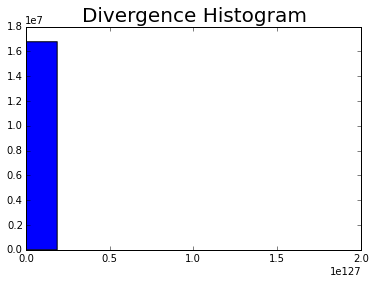

In [56]:
fig = plt.figure()
plt.hist(grid_Div_1D)
#plt.xlabel('
plt.title('Divergence Histogram', fontsize=20)
#plt.close(fig)

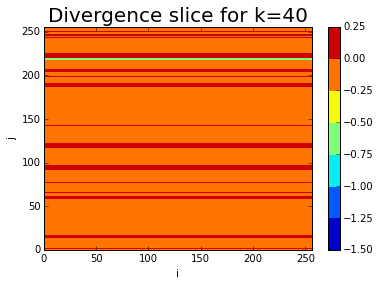

In [57]:
x = np.linspace(0, n_x, n_x)
X, Y = np.meshgrid(x, x)
plt.contourf(X, Y, grid_Div[:,:,40])
plt.colorbar()
plt.title('Divergence slice for k=40', fontsize=20)
plt.xlabel('i')
plt.ylabel('j')


(256, 256, 256)
(256, 256)
0.0


<matplotlib.colorbar.Colorbar instance at 0x7fd9a0dac518>

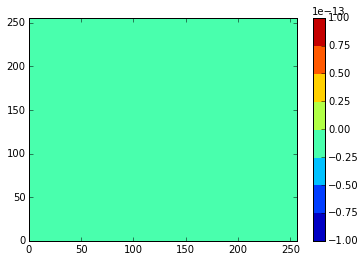

In [58]:
z_test = np.zeros((n_x,n_x))
print grid_Div.shape
#z_test = np.sum(grid_Div[:,:,120:125],axis=2)
print z_test.shape
print z_test[0,1]
fig = plt.figure()
levels=np.linspace(np.min(z_test),np.max(z_test), 10)
plt.contourf(X, Y, z_test)
plt.colorbar()

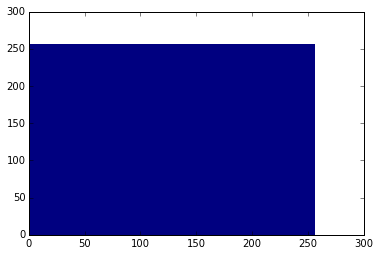

In [59]:
plt.pcolor(X, Y, grid_Div[:,:,0])

In [36]:
n_cuts = 8
l_x = n_x
l_y = n_y
l_z = n_z / n_cuts
l_z_old = 0

In [37]:
x = np.linspace(0, n_x, n_x)
X, Y = np.meshgrid(x, x)

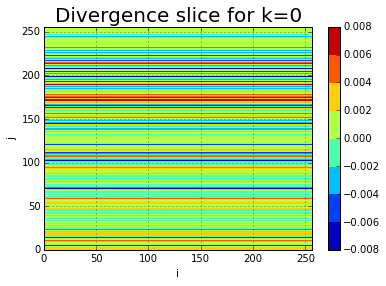

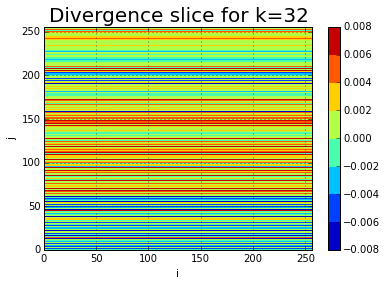

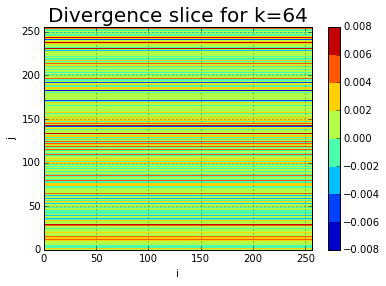

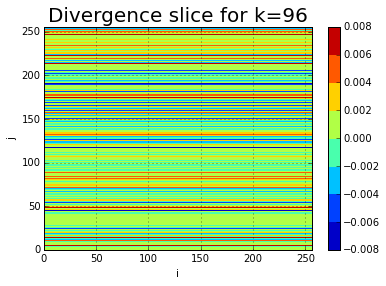

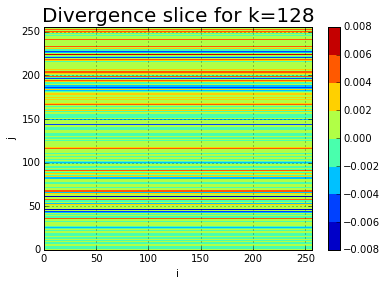

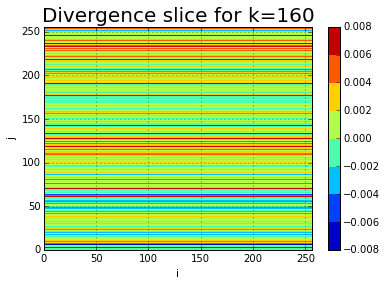

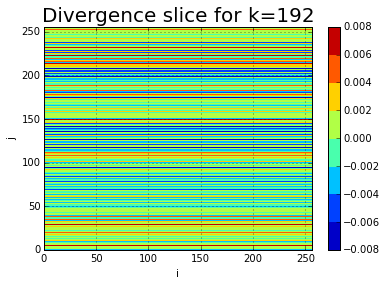

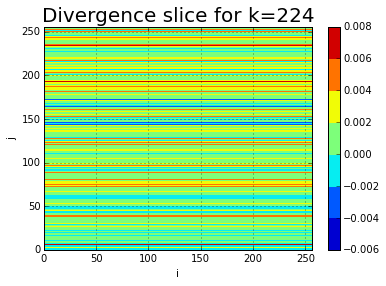

In [38]:
for i in range(0,n_cuts):
    l_z_new=l_z+i*l_z
    #new_grid = np.sum(grid_Div[:,:,l_z_old:l_z_new], axis=2)
    new_grid = grid_Div[:,:,l_z_old]
    fig=plt.figure()
    levels=np.linspace(np.min(new_grid),np.max(new_grid), 10)
    plt.contourf(X, Y, new_grid)
    plt.colorbar()
    plt.grid()
    plt.title('Divergence slice for k='+str(l_z_old), fontsize=20)
    plt.xlabel('i')
    plt.ylabel('j')
    l_z_old=l_z_new
    #plt.close(fig)
    